In [692]:
import pandas as pd
import numpy as np
import requests
import tweepy
import re
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats




## Gathring the data

In [383]:
# read the archive daa and store it
df_ar = pd.read_csv('twitter-archive-enhanced.csv')
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [384]:
#
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
# Quick check to the file content and structure
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [385]:

consumer_key = #  the key here
consumer_secret = # key secret
access_token = #token
access_token_secret = #token secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                 wait_on_rate_limit = True, # Automatically wait for rate limits to replenish
                 wait_on_rate_limit_notify = True) # Print a notification when Tweepy is waiting for rate limits to replenish


In [386]:
tweet =[]
err = []
i = 0
for tweet_id in df_ar['tweet_id']:
    try: 
        page = api.get_status(tweet_id, tweet_mode = 'extended')        
        favorites = page['favorite_count'] 
        retweets = page['retweet_count']
        date_time = page['created_at']
    
        tweet.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'date_time': pd.to_datetime(date_time)})
    
    except Exception as e:
        err.append(tweet_id)
        
print(len(tweet))
print(len(err))

Rate limit reached. Sleeping for: 217
Rate limit reached. Sleeping for: 193


2322
34


In [387]:
# Just in case we had an error 
err2 = []
for x in err:
    try:
        #print(x)
        page = api.get_status(x, tweet_mode = 'extended')        
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        date_time = page['created_at']
    
        tweet.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'date_time': pd.to_datetime(date_time)})
    
    except Exception as e:
        err2.append(x)


888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
846153765933735936
845459076796616705
844704788403113984
842892208864923648
837012587749474308
831262627380748289
829374341691346946
827228250799742977
812747805718642688
802247111496568832
788908386943430656
779124354206535695
775096608509886464
770743923962707968
767191397493538821
756288534030475264
754011816964026368
736736130620620800
718631497683582976
712717840512598017
711363825979756544
680055455951884288
674754018082705410
672466075045466113
671520732782923777


In [388]:
# we still have some error
err3 = []
for x in err2:
    try:
        page = api.get_status(x, tweet_mode = 'extended')        
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        date_time = page['created_at']
    
        tweet.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'date_time': pd.to_datetime(date_time)})
    
    except Exception as e:
        print(e)
        err3.append(x)


[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status fou

apperantly there is soething wrong with the tweet, 
I have run the code many time and im still getting the error

In [389]:
df_ar.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [390]:
len(tweet)

2335

In [391]:
j_tweets = pd.DataFrame(tweet, columns = ['tweet_id', 'favorites', 'retweets' , 'date_time'])
j_tweets.to_csv('tweet-json.txt', encoding = 'utf-8', index=False)
j_tweets = pd.read_csv('tweet-json.txt')
j_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 4 columns):
tweet_id     2335 non-null int64
favorites    2335 non-null int64
retweets     2335 non-null int64
date_time    2335 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


## Assessing The Data

In [392]:
df_ar

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [393]:
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [394]:
df_ar.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [395]:
images.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [396]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [397]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [398]:
j_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 4 columns):
tweet_id     2335 non-null int64
favorites    2335 non-null int64
retweets     2335 non-null int64
date_time    2335 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [399]:
j_tweets.head()

,tweet_id,favorites,retweets,date_time
0,892420643555336193,37448,8142,2017-08-01 16:23:56+00:00
1,892177421306343426,32182,6030,2017-08-01 00:17:27+00:00
2,891815181378084864,24267,3993,2017-07-31 00:18:03+00:00
3,891689557279858688,40750,8305,2017-07-30 15:58:51+00:00
4,891327558926688256,38987,8999,2017-07-29 16:00:24+00:00


In [400]:
j_tweets['tweet_id'].nunique()

2322

In [401]:
j_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 4 columns):
tweet_id     2335 non-null int64
favorites    2335 non-null int64
retweets     2335 non-null int64
date_time    2335 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


## Quality issues 
#### archive dataset ( df_ar )
1- all the id should be integer instead of float
<br>2- the timestamp should be typed as date time not an opject 
<br>3- we are not intersted in reply tweet 
<br>4- some numerator/donamenator value are wrong i.e.
<br>5- we are not intersted in tweet with no image
<br>6- some of the dog name are not valid i.e. a

#### image dataset (images )
<br>1- missing value compared to the archive dataset
<br>2- there is dublicated image 

#### json tweeet dataset (j_tweets)
<br>1- there is a duplicate id 
<br>2- we have missing value compared to the other two dataset  



## Tidiness issues 
1- we need to merge the diffrent data set
<br>2- In the image dataset we dont need the prediction for all the image especially if they are not dog



## Cleaning 


In [652]:
df_ar['tweet_id'].nunique()

2356

In [653]:
df = pd.merge(df_ar, images, how = 'left', on = ['tweet_id'] )
df = pd.merge(df, j_tweets, how = 'left', on = ['tweet_id'] )
df.to_csv('twitter_archive_master.csv. ', encoding = 'utf-8', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2368
Data columns (total 31 columns):
tweet_id                      2369 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2369 non-null object
source                        2369 non-null object
text                          2369 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2310 non-null object
rating_numerator              2369 non-null int64
rating_denominator            2369 non-null int64
name                          2369 non-null object
doggo                         2369 non-null object
floofer                       2369 non-null object
pupper                        2369 non-null object
puppo                         2369 non-null object
jpg_url                       20

There is additional id after the merge it may be due the diffrane id between image in archive

In [654]:
# Delete the retweet 
df = df[pd.isnull(df.retweeted_status_id)]
# Delete twewet without image
df = df.drop(df[pd.isnull(df.jpg_url)].index )
# Delete duplicat
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 2368
Data columns (total 31 columns):
tweet_id                      2007 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2007 non-null object
source                        2007 non-null object
text                          2007 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2007 non-null object
rating_numerator              2007 non-null int64
rating_denominator            2007 non-null int64
name                          2007 non-null object
doggo                         2007 non-null object
floofer                       2007 non-null object
pupper                        2007 non-null object
puppo                         2007 non-null object
jpg_url                       2007 non

In [655]:
# dropping the coulmn that we will not use 

df = df.drop('retweeted_status_id' ,1 )
df = df.drop('retweeted_status_user_id' ,1 )
df = df.drop('retweeted_status_timestamp' ,1 )

# drop time stamp because we have dae_time
df = df.drop('timestamp' ,1 )


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 2368
Data columns (total 27 columns):
tweet_id                 2007 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
source                   2007 non-null object
text                     2007 non-null object
expanded_urls            2007 non-null object
rating_numerator         2007 non-null int64
rating_denominator       2007 non-null int64
name                     2007 non-null object
doggo                    2007 non-null object
floofer                  2007 non-null object
pupper                   2007 non-null object
puppo                    2007 non-null object
jpg_url                  2007 non-null object
img_num                  2007 non-null float64
p1                       2007 non-null object
p1_conf                  2007 non-null float64
p1_dog                   2007 non-null object
p2                       2007 non-null object
p2_conf               

In [656]:
is_dog = [] 
prediction = []
confidence = []
def reduce_pred(x):
    i = 0
    while i < len(x) :
        #print (i)
        if x['p1_dog'].iloc[i,] == True :
            is_dog.append(True)
            prediction.append(x['p1'].iloc[i,])
            confidence.append(x['p1_conf'].iloc[i,])
        elif x['p2_dog'].iloc[i,] == True :
            is_dog.append(True)
            prediction.append(x['p2'].iloc[i,])
            confidence.append(x['p2_conf'].iloc[i,])
        elif x['p3_dog'].iloc[i,] == True:
            is_dog.append(True)
            prediction.append(x['p3'].iloc[i,])
            confidence.append(x['p3_conf'].iloc[i,])
        else:
            is_dog.append(False)
            prediction.append('NaN')
            confidence.append('NaN')
        i = i + 1

In [657]:
#temp = df.apply(reduce_pred(df) , axis=0)
reduce_pred(df)
df['is_dog'] = is_dog
#pred_df = pd.DataFrame(list(prediction))
df['prediction'] = pred_df
df['confidence'] = confidence
#print(confidence)
pred_df

,0
0,NaN
1,Chihuahua
2,Chihuahua
3,Labrador_retriever
4,basset
5,Chesapeake_Bay_retriever
6,Appenzeller
7,Pomeranian
8,Irish_terrier
9,Pembroke


In [658]:
df['prediction'].iloc[4,]

'basset'

In [659]:
# dropping the coulmn that we will not use 

df = df.drop('p1' ,1 )
df = df.drop('p1_conf' ,1 )
df = df.drop('p1_dog' ,1 )

df = df.drop('p2' ,1 )
df = df.drop('p2_conf' ,1 )
df = df.drop('p2_dog' ,1 )

df = df.drop('p3' ,1 )
df = df.drop('p3_conf' ,1 )
df = df.drop('p3_dog' ,1 )



In [660]:
df = df.drop('in_reply_to_status_id' ,1 )
df = df.drop('in_reply_to_user_id' ,1 )

In [661]:
# cheking for duplicate data 
# im dropping the prediction and confidance because they are mutiablie thus the algorthim does'nt work with them
# and they are meaninng less in term of duplicate
df_temp = df
df_temp = df_temp.drop('prediction' , 1)
df_temp = df_temp.drop('confidence' , 1)

df_temp.apply(lambda x: len(x.unique()))

tweet_id              1994
source                   3
text                  1994
expanded_urls         1994
rating_numerator        34
rating_denominator      15
name                   936
doggo                    2
floofer                  2
pupper                   2
puppo                    2
jpg_url               1994
img_num                  4
favorites             1844
retweets              1566
date_time             1991
is_dog                   2
dtype: int64

#### We can see that the tog type can be easily merged to one column 

In [662]:
Dog_Type = [] 
def get_dog_type(x):
    i = 0
    while i < len(x) :
        #print (i)
        if x['doggo'].iloc[i,] == 'doggo' :
            Dog_Type.append('doggo')
        elif x['floofer'].iloc[i,] == 'floofer' :
            Dog_Type.append('floofer')
        elif x['pupper'].iloc[i,] == 'pupper':
            Dog_Type.append('pupper')
        elif x['puppo'].iloc[i,] == 'puppo':
            Dog_Type.append('puppo')
        else:
            Dog_Type.append('Unknown')
        i = i + 1

In [663]:
get_dog_type(df)
df['Dog_Type'] = Dog_Type

In [664]:
df = df.drop('doggo' , 1)
df = df.drop('floofer' , 1)
df = df.drop('pupper' , 1)
df = df.drop('puppo' , 1)


In [665]:
# cleaning the source so its readable for human
df['source'] = df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])


In [678]:
# Cleaning the false rating i.e. Rating were they are bellow 1 cause they are good dog brent
rating = []
def good_rating(x):
    i = 0
    while i < len(x)  :
        #print(i)
        if ((x['rating_denominator'].iloc[i,] > x['rating_numerator'].iloc[i,] )):
            rating.append(np.nan)
        else:
            rate_x = ( x['rating_numerator'].iloc[i,] / x['rating_denominator'].iloc[i,] ) * 10
            rating.append(rate_x)
        i = i + 1

In [679]:
good_rating(df)
print(len(rating))
df['rating'] = rating
#df['rating_denominator_n'] = rating_denominator_n
#since the base is 10 rating_denominator_n is redundant

1636


In [680]:
df = df.drop('rating_denominator' , 1)
df = df.drop('rating_numerator' , 1)


In [681]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 2006
Data columns (total 15 columns):
tweet_id         1375 non-null int64
source           1375 non-null category
text             1375 non-null object
expanded_urls    1375 non-null object
name             1375 non-null object
jpg_url          1375 non-null object
img_num          1375 non-null int32
favorites        1375 non-null int32
retweets         1375 non-null int32
date_time        1375 non-null datetime64[ns]
is_dog           1375 non-null bool
prediction       1375 non-null object
confidence       1375 non-null object
Dog_Type         1375 non-null category
rating           1375 non-null float64
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int32(3), int64(1), object(6)
memory usage: 127.9+ KB


In [682]:
df

,tweet_id,source,text,expanded_urls,name,jpg_url,img_num,favorites,retweets,date_time,is_dog,prediction,confidence,Dog_Type,rating
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,37448,8142,2017-08-01 16:23:56,False,NaN,NaN,Unknown,13.0
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,32182,6030,2017-08-01 00:17:27,True,Chihuahua,0.323581,Unknown,13.0
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,24267,3993,2017-07-31 00:18:03,True,Chihuahua,0.716012,Unknown,12.0
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,40750,8305,2017-07-30 15:58:51,True,Labrador_retriever,0.168086,Unknown,13.0
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,38987,8999,2017-07-29 16:00:24,True,basset,0.555712,Unknown,12.0
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,19586,2984,2017-07-29 00:08:17,True,Chesapeake_Bay_retriever,0.425595,Unknown,13.0
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,11443,1982,2017-07-28 16:27:12,True,Appenzeller,0.341703,Unknown,13.0
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,63141,18108,2017-07-28 00:22:40,True,Pomeranian,0.566142,Unknown,13.0
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,26950,4098,2017-07-27 16:25:51,True,Irish_terrier,0.487574,Unknown,13.0
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,30889,7081,2017-07-26 15:59:51,True,Pembroke,0.511319,doggo,14.0


In [683]:
# defining the type aappropriatally helps with reducing the data size and make it easier to work with
df = df.astype({"img_num":'int32'})
df = df.astype({"favorites":'int32',  "retweets":'int32' , "date_time" : 'datetime64[ns]' })
df = df.astype({"Dog_Type":'category',  "source":'category' })
df = df.astype({"rating":'int32' })

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 2006
Data columns (total 15 columns):
tweet_id         1375 non-null int64
source           1375 non-null category
text             1375 non-null object
expanded_urls    1375 non-null object
name             1375 non-null object
jpg_url          1375 non-null object
img_num          1375 non-null int32
favorites        1375 non-null int32
retweets         1375 non-null int32
date_time        1375 non-null datetime64[ns]
is_dog           1375 non-null bool
prediction       1375 non-null object
confidence       1375 non-null object
Dog_Type         1375 non-null category
rating           1375 non-null int32
dtypes: bool(1), category(2), datetime64[ns](1), int32(4), int64(1), object(6)
memory usage: 122.5+ KB


In [684]:
df.to_csv('twitter_archive_master.csv', index=False )

## Analysis and visualization 

#### Dog stages

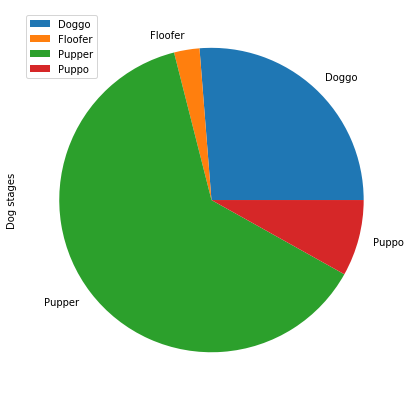

In [685]:

doggo = df['Dog_Type'].apply(lambda x: 1 if x=='doggo' else 0).sum()
floofer = df['Dog_Type'].apply(lambda x: 1 if x== 'floofer' else 0).sum()
pupper = df['Dog_Type'].apply(lambda x: 1 if x== 'pupper' else 0).sum()
puppo = df['Dog_Type'].apply(lambda x: 1 if x== 'puppo' else 0).sum()

temp = pd.DataFrame({'Dog stages': [doggo,floofer,pupper,puppo]},
                  index=['Doggo', 'Floofer' , 'Pupper' , 'Puppo'])
plot = temp.plot.pie(y='Dog stages', figsize=(7, 7))


In [686]:
df.corr()

,tweet_id,img_num,favorites,retweets,is_dog,rating
tweet_id,1.000000,0.126679,0.552108,0.310469,-0.000368,0.009584
img_num,0.126679,1.000000,0.062536,0.051299,0.005975,-0.008851
favorites,0.552108,0.062536,1.000000,0.925903,-0.018375,-0.000828
retweets,0.310469,0.051299,0.925903,1.000000,-0.040031,0.004296
is_dog,-0.000368,0.005975,-0.018375,-0.040031,1.000000,-0.080371
rating,0.009584,-0.008851,-0.000828,0.004296,-0.080371,1.000000


From the correlation matrix we can see that there is no significnt reelationship between the dog rating and how many retweet/favorites a tweet have
The only significant relation is between the retweet/favorites count

#### Popular doggo breed

In [687]:
df['prediction'].value_counts()

NaN                               201
golden_retriever                  112
Labrador_retriever                 79
Pembroke                           63
Chihuahua                          57
pug                                39
toy_poodle                         36
Samoyed                            31
chow                               30
Pomeranian                         29
malamute                           25
cocker_spaniel                     23
French_bulldog                     23
Chesapeake_Bay_retriever           21
Siberian_husky                     17
Cardigan                           16
German_shepherd                    16
miniature_pinscher                 15
Shih-Tzu                           15
Rottweiler                         14
Eskimo_dog                         14
beagle                             13
Staffordshire_bullterrier          13
Lakeland_terrier                   13
West_Highland_white_terrier        12
soft-coated_wheaten_terrier        12
American_Sta

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0, 0.5, 'dog breed')

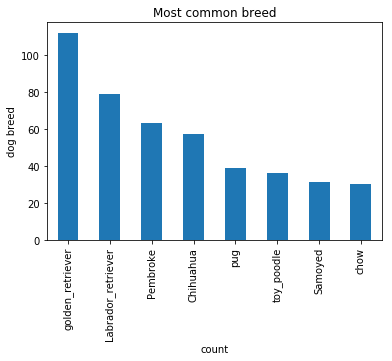

In [688]:
df_by_breed = df.groupby('prediction').filter(lambda x: len(x) >= 30)
df_by_breed = df_by_breed[df.prediction !='NaN']
df_by_breed['prediction'].value_counts().plot(kind = 'bar')
plt.title('Most common breed')
plt.xlabel('count')
plt.ylabel('dog breed')

#### From this we can say that the most recognized dog by the algorithim is golden retriever, it can give us an idea although not conclusive about the most popular breed of dog 

### Dog Rating over time

In [689]:
df['rating'].max()

1776

Text(0, 0.5, 'Rating')

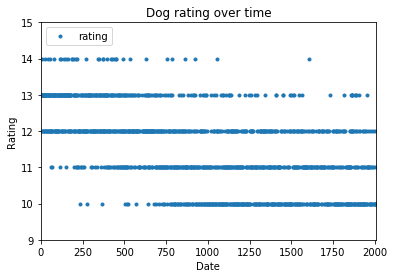

In [690]:
# i'll not consider the outlier in this graph
df.plot(y ='rating', ylim=[9,15], style = '.' )
plt.title('Dog rating over time')
plt.xlabel('Date')
plt.ylabel('Rating')

In [694]:
df['rating'].describe()

count    1375.000000
mean       12.890909
std        47.632919
min        10.000000
25%        11.000000
50%        12.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [695]:
#removiing the outlier
df['rating'].apply(lambda x: x if x<20 else np.nan).describe()


count    1370.000000
mean       11.523358
std         1.105056
min        10.000000
25%        11.000000
50%        12.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64